In [9]:
import pandas as pd 
import seaborn as sns
#from ydata_profiling import ProfileReport
#import sweetviz as sv
#import dtale
import numpy as np
import statistics
from sklearn.metrics import matthews_corrcoef
import matplotlib.pyplot as plt
import sweetviz  as sv

In [19]:


matrix = [[1,0,0,0,0,0,0,0,0],
          [0,0,0,0,0,0,0,0,0],
          [0,0,1,0,0,0,0,0,0],
          [1,1,0,0,1,0,1,1,1],
          [0,0,0,0,1,0,0,0,0],
          [0,0,0,0,0,1,0,0,0],
          [0,0,1,0,0,0,1,0,0],
          [1,1,1,1,1,0,1,1,1],
          [0,0,0,0,0,0,0,1,0],
          [0,0,0,0,0,0,0,0,1],
          [0,0,0,0,1,0,0,0,0],
          [0,1,1,1,1,1,0,1,1],
          [0,0,1,0,0,0,0,0,0],
          [0,1,0,0,1,0,0,1,0],
          [0,1,1,1,0,0,1,0,1],
          [1,1,1,0,1,1,1,1,1]]

In [18]:

def bool_rabit(counts):
    results = []
    for i in counts:
        if i <= 2:
            results.append(1) # не больное 
        elif 3 <= i <= 5:
            results.append(2) # подозрительное 
        else:
            results.append(3) # больное
    return results


counts = [sum(row) for row in matrix]
total = sum(counts)
results = bool_rabit(counts)
print("Количество 1 в каждой строке:", counts)
print("Общее количество 1 в матрице:", total)
print("Выводы по строкам:", results)

Количество 1 в каждой строке: [1, 0, 1, 6, 1, 1, 2, 8, 1, 1, 1, 7, 1, 3, 5, 8]
Общее количество 1 в матрице: 47
Выводы по строкам: [1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 2, 2, 3]


In [ ]:
import pandas as pd
import numpy as np

data_clinical = {
    'id_rabit' : [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16],
    'group_rabit' : [1.1,2.1,3.1,4.1,1.2,2.2,3.2,4.2,1.3,2.3,3.3,4.3,1.4,2.4,3.4,4.4],
    'signs_rabit' : counts,  # 1 - не больное, 2 - подозрительное, 3 - больное
    'feed_types_rabit' : [1,1,1,1,   # зеленные
                          2,2,2,2,   # сочные
                          3,3,3,3,   # концентрированный
                          4,4,4,4,], # не сбалансированный
    'morbidity' : results
}

data_clinical_rabit = pd.DataFrame(data_clinical)

print(data_clinical_rabit)


    id_rabit  group_rabit  signs_rabit  feed_types_rabit  morbidity
0          1          1.1            1                 1          1
1          2          2.1            0                 1          1
2          3          3.1            1                 1          1
3          4          4.1            6                 1          3
4          5          1.2            1                 2          1
5          6          2.2            1                 2          1
6          7          3.2            2                 2          1
7          8          4.2            8                 2          3
8          9          1.3            1                 3          1
9         10          2.3            1                 3          1
10        11          3.3            1                 3          1
11        12          4.3            7                 3          3
12        13          1.4            1                 4          1
13        14          2.4            3          

<Axes: >

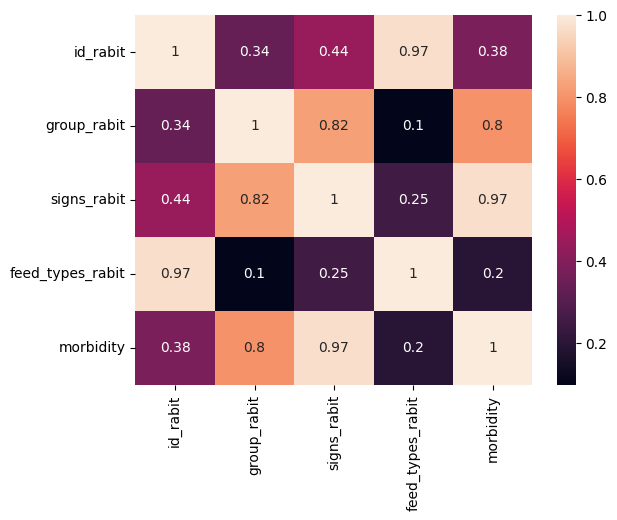

In [13]:
sns.heatmap(data_clinical_rabit.corr(numeric_only=True), annot=True)

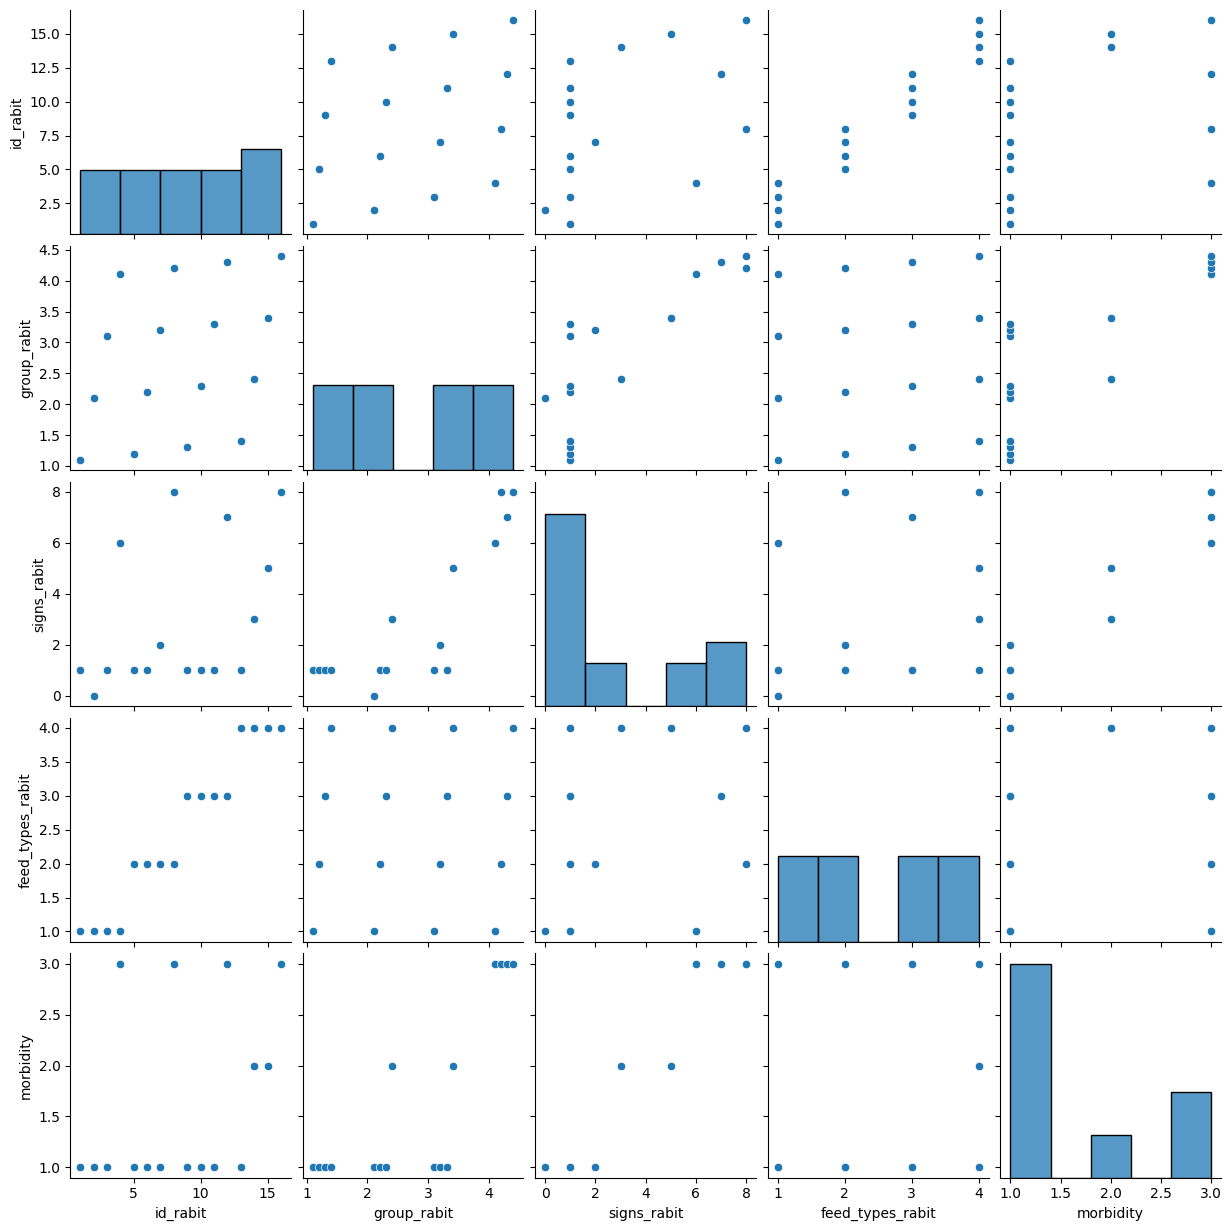

In [14]:
sns.pairplot(data_clinical_rabit)

In [15]:

# Первоначальные данные
feed_types = ["Зеленый", "Зерновой", "Концентрированный"]  # Обозначаем типы кормов сокращенно
Protein_Content = [36, 19, 25, 0]
Caloric_Value = [500, 783, 789, 0]
fats = [5, 8, 11, 0]
feed_types_no =  ["Не сбалансированный"]
# Количество необходимых строк
num_rows = 4

# Преобразование данных в массивы и размножение их
repetitions = num_rows // len(feed_types) + 1  # Определяем, сколько копий понадобится
repetitions_no = num_rows // len(feed_types_no) + 1  # Определяем, сколько копий понадобится

feed_types_replicated = np.tile(feed_types, repetitions)[:num_rows]
protein_replicated = np.repeat(Protein_Content, repetitions)[:num_rows]
calories_replicated = np.repeat(Caloric_Value, repetitions)[:num_rows]
fats_replicated = np.repeat(fats, repetitions)[:num_rows]

# Вносим небольшие случайные вариации
def perturb_value(value):
    return value * np.random.uniform(0.5, 0)  # Изменяем каждый элемент на ~±50%


protein_replicated = protein_replicated.astype(float)
calories_replicated = calories_replicated.astype(float)
fats_replicated = fats_replicated.astype(float) 


protein_replicated = [round(perturb_value(p), 2) for p in protein_replicated]
calories_replicated = [round(perturb_value(c), 2) for c in calories_replicated]
fats_replicated = [round(perturb_value(f), 2) for f in fats_replicated]


# Новый датафрейм
data_new = {
    'Feed_Type': feed_types_replicated,
    'Proteins': protein_replicated,
    'Calories': calories_replicated,
    'Fats': fats_replicated
}

df_expanded = pd.DataFrame(data_new)

print(df_expanded.head())  # Показываем первые пять строк
print("\\nРазмер датафрейма:", df_expanded.shape)

           Feed_Type  Proteins  Calories  Fats
0            Зеленый      2.07     13.62  1.72
1           Зерновой      2.29     69.46  1.17
2  Концентрированный      8.82    272.59  2.82
3            Зеленый      8.15    219.73  3.76
\nРазмер датафрейма: (4, 4)
